<a href="https://colab.research.google.com/github/lupis30puc/yelp_bert_random_forest/blob/lupis30puc-update-1/Yelp_polarity_preprocessing_for_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Yelp Polarity on kaggle](https://www.kaggle.com/irustandi/yelp-review-polarity)

1,569 samples from the Yelp Dataset Challenge 2015. This subset has 280,000 training samples and 19,000 test samples in each polarity.

In [9]:
!pip install transformers

     |████████████████████████████████| 1.5MB 6.3MB/s 
     |████████████████████████████████| 890kB 23.1MB/s 
     |████████████████████████████████| 2.9MB 30.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=0904009905a24b40bd059c439fe53efa57a21a2489d2f79e027140b1aac5d354
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### Loading the datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import re

In [5]:
#cols = ['label', 'text']
#df_1 = pd.read_csv('/content/drive/MyDrive/Yelp/train.csv', header=None, names= cols) #I'll do only test first, for time/resources purposes
#df_2 = pd.read_csv('/content/drive/MyDrive/Yelp/test.csv', header=None, names=cols)
sample_reviews = pd.read_csv('/content/drive/MyDrive/Yelp/sample_yelp_reviews_12993.csv')

In [7]:
sample_reviews.drop(labels= 'Unnamed: 0', axis=1, inplace=True)
sample_reviews.head()

,text,Label
0,This actually used to be one of my favorite ho...,0
1,Decent food. Fishermen lobster or even congee ...,0
2,"Pros: Fun atmosphere, great for people watchin...",0
3,"I love bookstores, and I love to spend some ti...",0
4,"I passed Five Guys, In-N-Out, Carl's Jr, and S...",0


In [8]:
#print('Train shape: ' + str(train_df.shape))
print('Sample shape: ' + str(sample_reviews.shape))

Sample shape: (12993, 2)


### Tokenizing reviews to get the length 

In [10]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


In [11]:
# creating a function to tokenize the reviews
def tokenize_text_in_df(dataframe):
  """
  The input df needs to have a 'text' column.
  With this function the df texts will be tokenized and we will obtain the text length in tokens.

  The output df will have 2 more columns:
    - 'tokenized'
    - 'len'

  """

  dataframe['tokenized'] = None #the text tokenized
  dataframe['len'] = None #length in tokens count
  
  for i in range(len(dataframe)):
    dataframe.tokenized[i] = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(dataframe.text[i]))
    dataframe.len[i] = len(dataframe.tokenized[i])
  
  return dataframe

In [12]:
%%time
# inserting the tokenized reviews on a df
tokens_len_df = sample_reviews.copy()
tokens_len_df = tokenize_text_in_df(tokens_len_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 39.5 s, sys: 36.2 ms, total: 39.5 s
Wall time: 39.8 s


In [13]:
tokens_len_df.head()

,text,Label,tokenized,len
0,This actually used to be one of my favorite ho...,0,"[2023, 2941, 2109, 2000, 2022, 2028, 1997, 202...",817
1,Decent food. Fishermen lobster or even congee ...,0,"[11519, 2833, 1012, 16532, 27940, 2030, 2130, ...",60
2,"Pros: Fun atmosphere, great for people watchin...",0,"[4013, 2015, 1024, 4569, 7224, 1010, 2307, 200...",98
3,"I love bookstores, and I love to spend some ti...",0,"[1045, 2293, 21785, 2015, 1010, 1998, 1045, 22...",189
4,"I passed Five Guys, In-N-Out, Carl's Jr, and S...",0,"[1045, 2979, 2274, 4364, 1010, 1999, 1011, 105...",81


### EDA

Shape is: 12,993 reviews

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


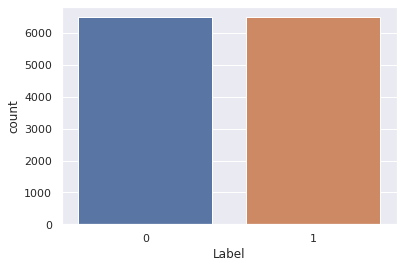

In [15]:
# Checking the label distribbution
sns.countplot(tokens_len_df['Label'])

In [16]:
max(tokens_len_df['len'])

1247

CPU times: user 332 ms, sys: 109 ms, total: 441 ms
Wall time: 331 ms


<Figure size 864x648 with 0 Axes>

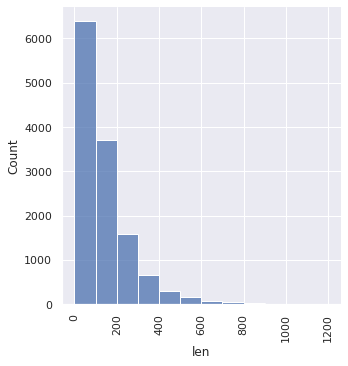

In [18]:
%%time
# checking the reviews' length distribution
plt.figure(figsize=(12, 9))
plot = sns.displot(tokens_len_df['len'], bins=np.arange(0,1250,100))
plt.xticks(rotation=90)

CPU times: user 433 ms, sys: 103 ms, total: 536 ms
Wall time: 428 ms


<Figure size 864x648 with 0 Axes>

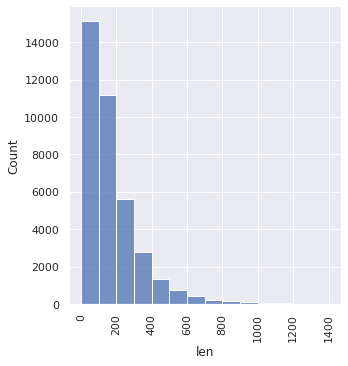

In [ ]:
%%time
# checking the reviews' length distribution
plt.figure(figsize=(12, 9))
plot = sns.displot(tokens_len_df['len'], bins=np.arange(0,1500,100))
plt.xticks(rotation=90)


In [19]:
tokens_len_df['len'].describe(include='all')

count     12993
unique      708
top          31
freq        105
Name: len, dtype: int64

CPU times: user 516 ms, sys: 173 ms, total: 689 ms
Wall time: 506 ms


<Figure size 864x648 with 0 Axes>

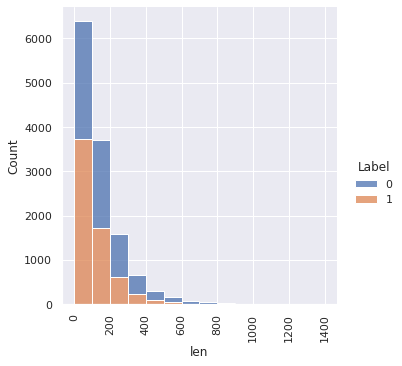

In [21]:
%%time 
# checking the sample reviews' length distribution
plt.figure(figsize=(12, 9))
plot = sns.displot(data=tokens_len_df, x='len', hue='Label', multiple='stack', bins=np.arange(0,1500,100))
plt.xticks(rotation=90)

In [22]:
tokens_len_df.to_csv('sample_len_tokens.csv')

# On the preprocessing part we could erase blank spaces and other things that don't favor the texts for the model

In [ ]:
"""
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
from nltk.corpus import stopwords
import re
"""